# Milestone 1: Exploratory Data Analysis

**Authors**: __Khizer Zakir & Rodrigo Brust Santos__

__October 2023__

## 2. Visual Exploration


In [2]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from tabulate import tabulate
import warnings

In [14]:
# original dataset to see the distribution of the data 

file_path = '../pontos_limpo.csv'
df = pd.read_csv(file_path, sep=',')
df.head()


,Estação,N__Lab_,Long__X_,Lat__Y_,Folha,Ag (ppm),Al (%),As (ppm),Au (ppm),B (ppm),...,Ta (ppm),Te (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
0,AC-0002,CDE225,248757,7972050,Coromandel,0.03,2.63,4.0,0.05,5,...,25.0,0.06,7.4,0.03,0.70,73,0.3,13.15,27,6.3
1,AC-0003,CDE226,244460,7973135,Coromandel,0.02,1.93,2.0,0.05,5,...,25.0,0.14,8.2,0.06,0.94,58,0.3,23.90,58,6.9
2,AC-0004,CDE227,244044,7970217,Coromandel,0.04,1.47,3.0,0.05,5,...,25.0,0.08,5.4,0.04,0.65,55,0.2,10.40,34,1.8
3,AC-0005,CDE228,242895,7970593,Coromandel,0.05,1.72,23.0,0.05,5,...,25.0,25.00,6.9,0.04,1.01,66,0.7,9.34,27,4.1
4,AC-0006,CDE229,242999,7971416,Coromandel,0.04,0.97,7.0,0.05,5,...,25.0,25.00,5.7,0.05,0.82,41,0.4,7.45,28,1.5


In [ ]:
# only numeric columns to visualize the distribution of the data


plt.figure(figsize=(30, 18))
corr_mat = df.select_dtypes(include='number').corr()
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": 0.7}, mask=mask)
plt.title("Correlation Matrix for All Numeric Variables", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)

plt.show()



### Figure 1: Correlation Matrix Explanation

This figure is extremely essential in understanding the relationship between all the variables. Mostly, it is assumed that all the variables, especially the explanantory variables preferably be independent to help train the model to perform well against an unseen data. Although there are some red patches in between, the data looks really good to explain the target variable 'Zn'. In our used case, some of the stronger correlations are inevitable given the chemical associations of a few elements in their respective outcrops. This plot along with the following plots help use identify the main variables and the variables that we need to drop. 

c:\Users\kizar\miniconda3\envs\ml_class_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kizar\miniconda3\envs\ml_class_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kizar\miniconda3\envs\ml_class_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kizar\miniconda3\envs\ml_class_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

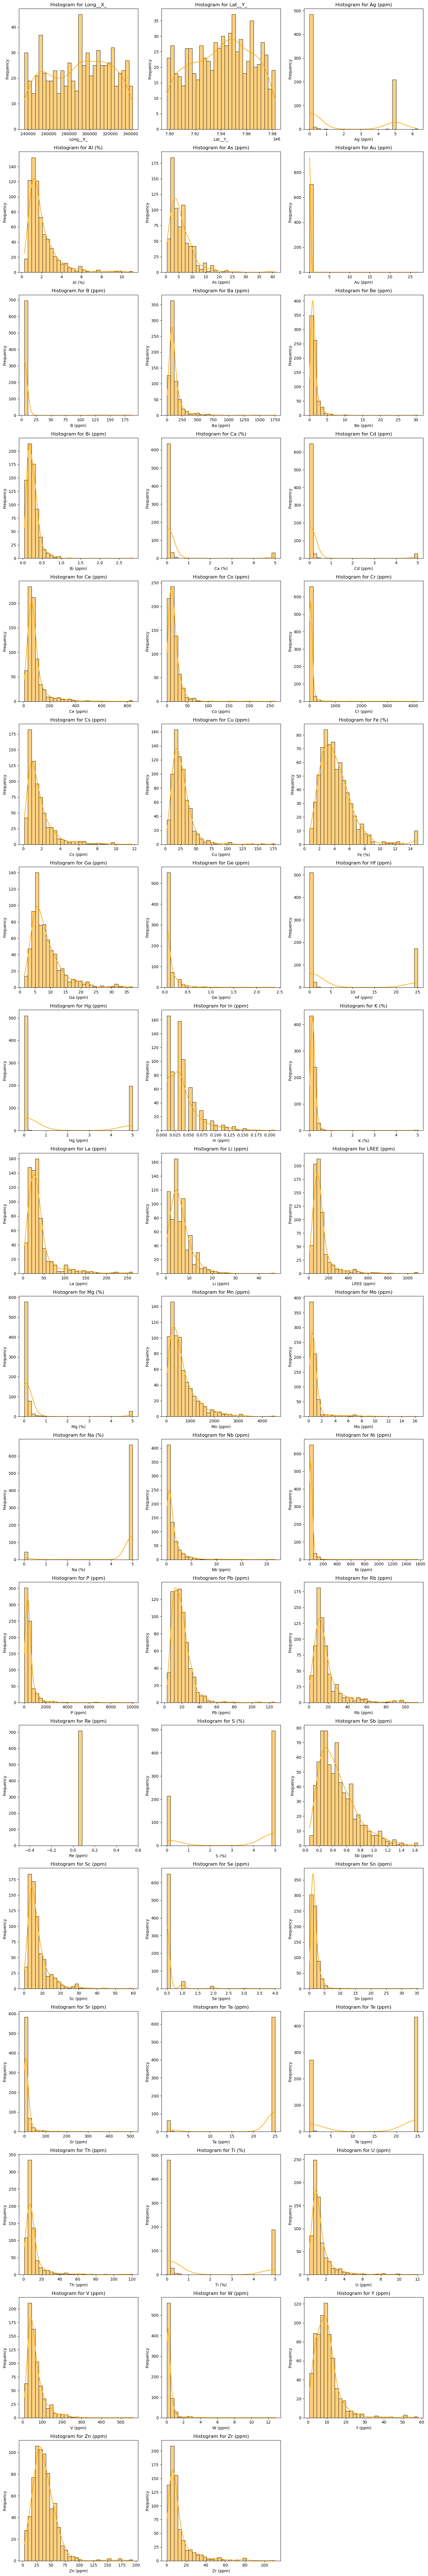

In [21]:

numeric_feature_names = df.select_dtypes(include=np.number).columns.tolist()
numeric_features = df[numeric_feature_names]

# Calculate the number of subplots needed
num_rows = len(numeric_feature_names) // 3 + (len(numeric_feature_names) % 3 > 0)
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# Loop through numeric features
for i, feature_name in enumerate(numeric_feature_names):
    sns.histplot(numeric_features[feature_name], kde=True, ax=axs[i], color='orange', bins=30)
    axs[i].set_title(f'Histogram for {feature_name}')
    axs[i].set_xlabel(feature_name)
    axs[i].set_ylabel('Frequency')

# Remove empty subplots if there are any
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


### Figure 2: Histplot

These subplots demonstrate the distribution of each variable in the dataset. Most of the variables are right/positive-skewed as appear in the distribution. We will try log-transformation on the data to see if we can handle the skewness and impact of the outliers and high variance through that

c:\Users\kizar\miniconda3\envs\ml_class_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kizar\miniconda3\envs\ml_class_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kizar\miniconda3\envs\ml_class_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kizar\miniconda3\envs\ml_class_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

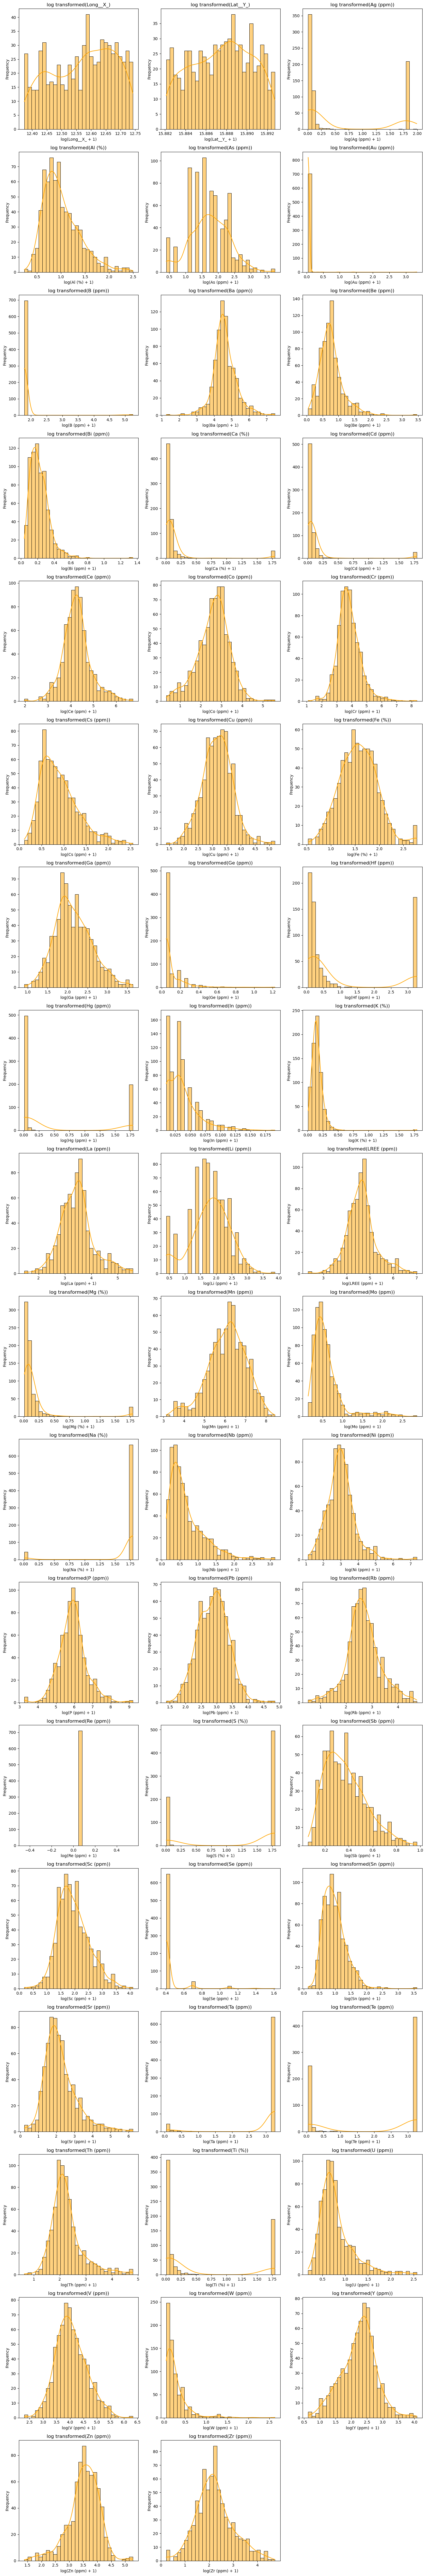

In [23]:
# -- log transformation

fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

axs = axs.flatten()

# Loop through numeric features
for i, feature_name in enumerate(numeric_feature_names):
    # Apply log transformation (log1p handles zero values)
    transformed_feature = np.log1p(numeric_features[feature_name])
    
    sns.histplot(transformed_feature, kde=True, ax=axs[i], color='orange', bins=30)
    axs[i].set_title(f'log transformed({feature_name})')
    axs[i].set_xlabel(f'log({feature_name} + 1)')
    axs[i].set_ylabel('Frequency')

# Remove empty subplots if there are any
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


### Figure 3: Log Transformation plot

This plot really helped to understand the distribution of the data values and handle the effect of outliers, high variance and the skewness of the data. This transformation is crucial as it aids the selection of important variables for the later stages.

In [26]:
df_train = pd.read_csv('../training.csv')
df_test = pd.read_csv('../testing.csv')
# Assuming df_train and df_test are your DataFrames
print("DataFrame - df_train:")
print(tabulate(df_train.head(), headers='keys', tablefmt='pretty'))

print("\nDataFrame - df_test:")
print(tabulate(df_test.head(), headers='keys', tablefmt='pretty'))


DataFrame - df_train:
+---+----------+-----------+----------+--------+----------+----------+----------+----------+--------+----------+----------+----------+----------+----------+----------+--------+----------+----------+----------+----------+-------+----------+----------+------------+--------+----------+----------+----------+----------+---------+----------+----------+----------+----------+----------+----------+----------+--------+---------+---------+---------+---------+----------+----------+
|   |    x     |     y     | Ag (ppm) | Al (%) | As (ppm) | Ba (ppm) | Be (ppm) | Bi (ppm) | Ca (%) | Cd (ppm) | Ce (ppm) | Co (ppm) | Cr (ppm) | Cs (ppm) | Cu (ppm) | Fe (%) | Ga (ppm) | Hf (ppm) | Hg (ppm) | In (ppm) | K (%) | La (ppm) | Li (ppm) | LREE (ppm) | Mg (%) | Mn (ppm) | Mo (ppm) | Nb (ppm) | Ni (ppm) | P (ppm) | Pb (ppm) | Rb (ppm) | Sb (ppm) | Sc (ppm) | Sn (ppm) | Sr (ppm) | Th (ppm) | Ti (%) | U (ppm) | V (ppm) | W (ppm) | Y (ppm) | Zr (ppm) | Zn (ppm) |
+---+----------+-----------+


### 2.1 Visualizing the Dataset
Provide a few figures to help understand the dataset.


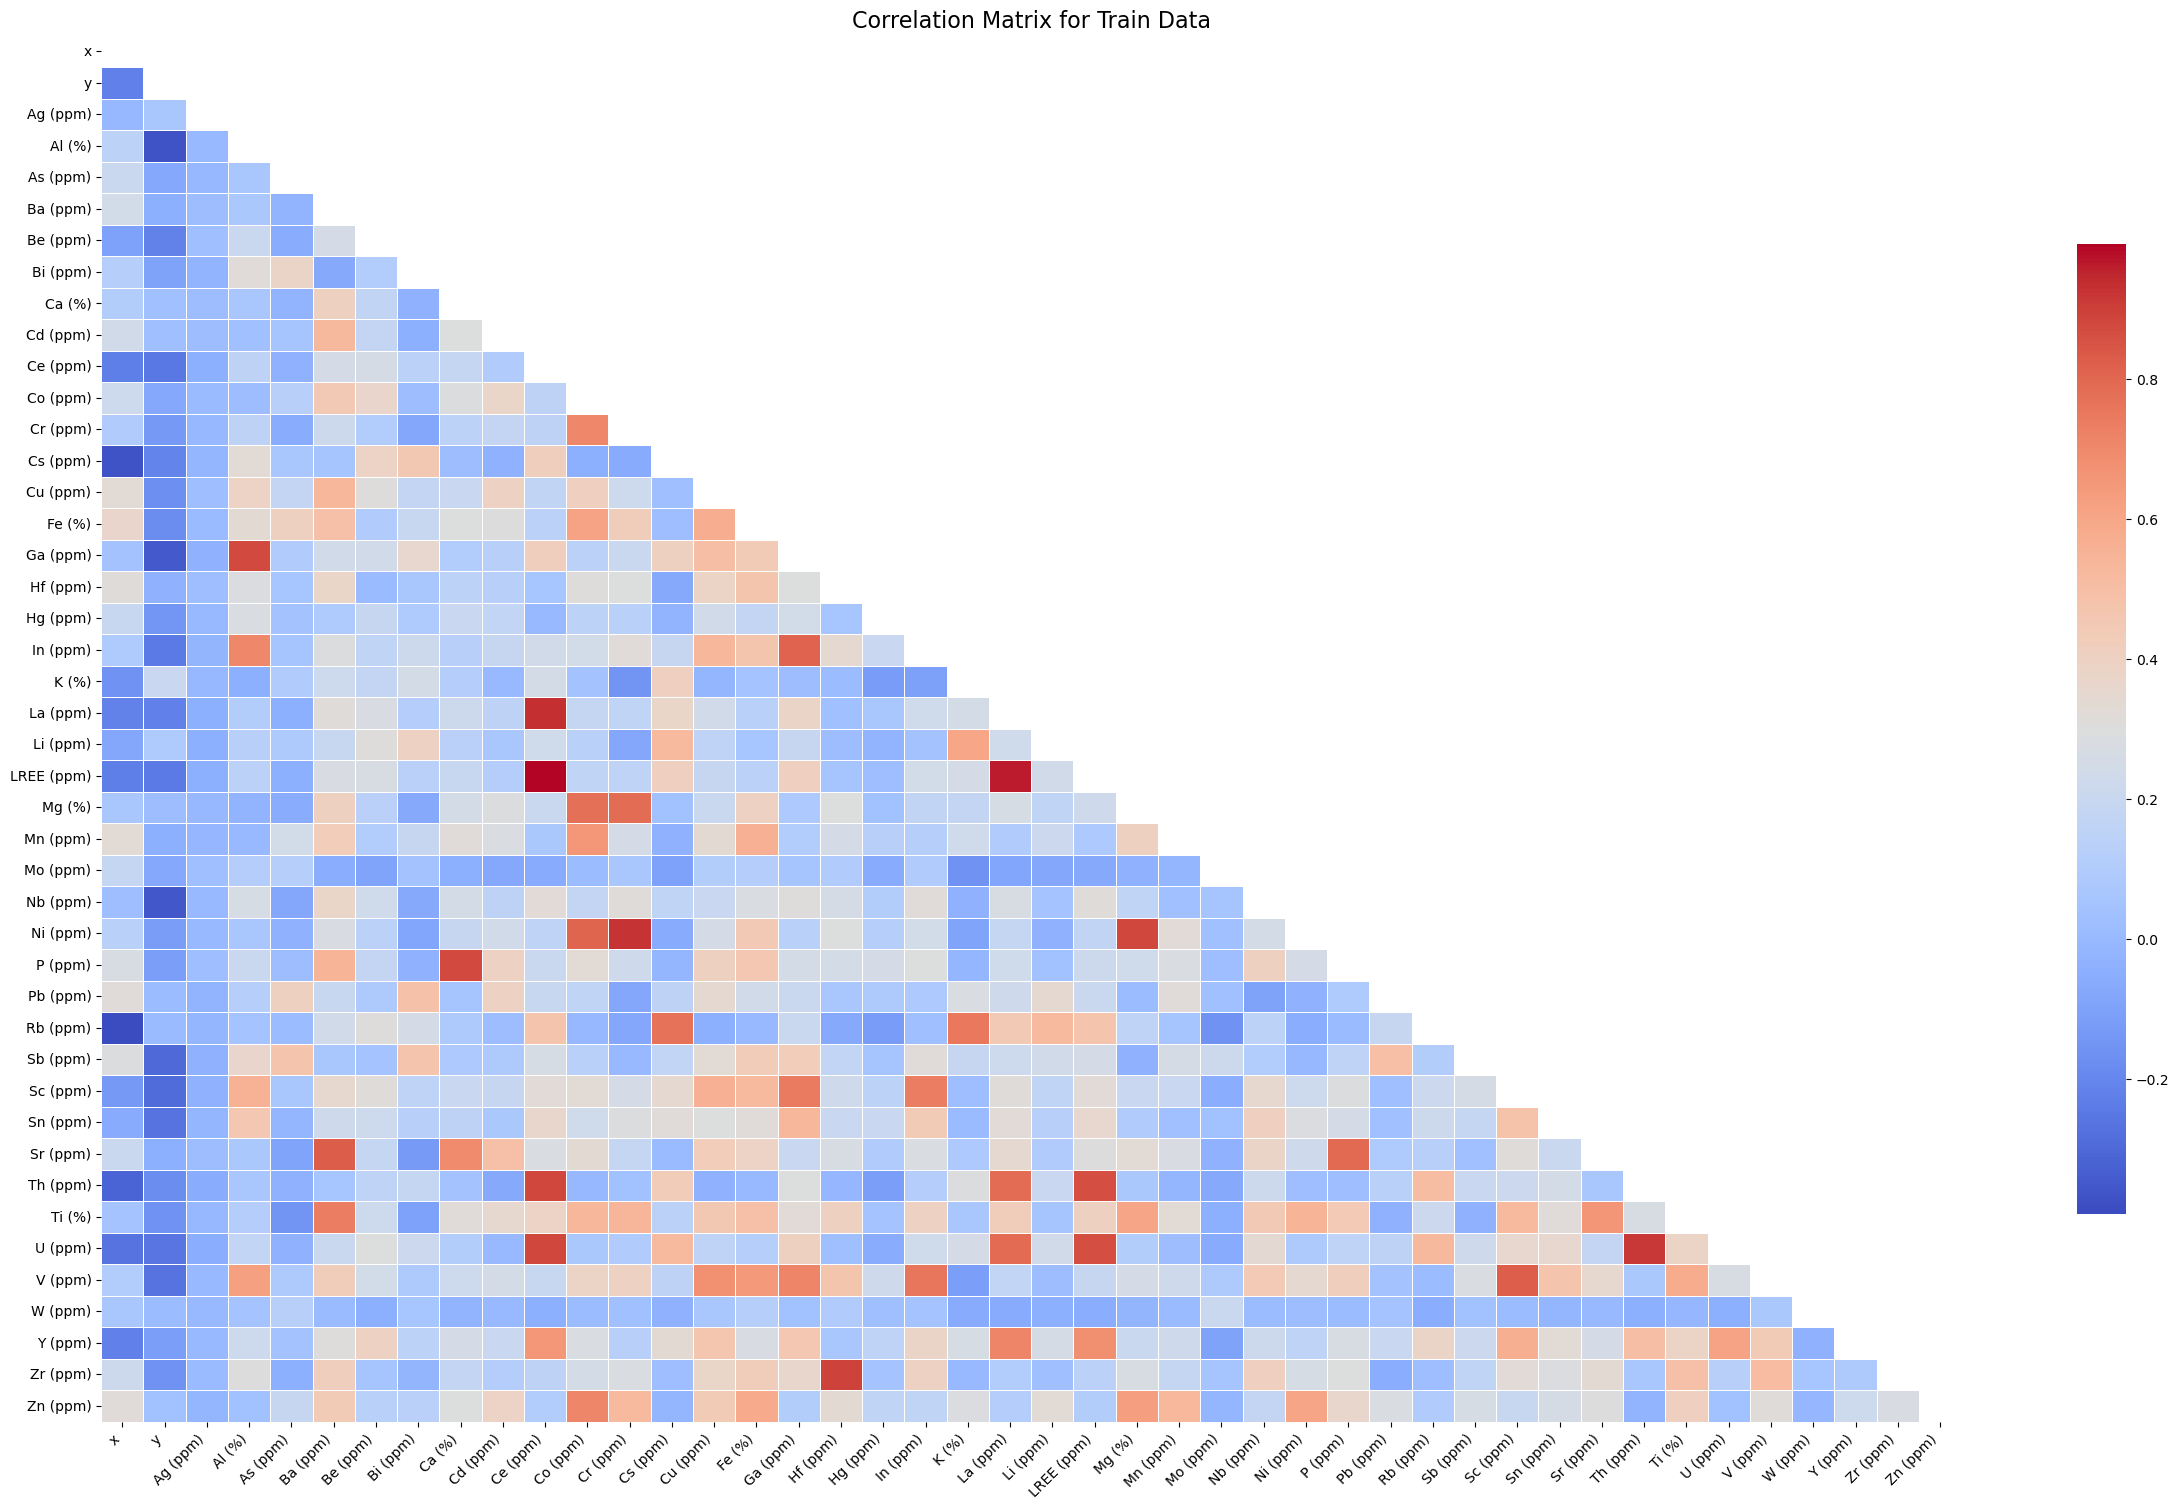

In [29]:
#-- visualizing the distribution of the training data


plt.figure(figsize=(30, 18))
corr_mat_train = df_train.corr()
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_mat_train, dtype=bool))
sns.heatmap(corr_mat_train, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": 0.7}, mask=mask)
plt.title("Correlation Matrix for Train Data", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)

plt.show()


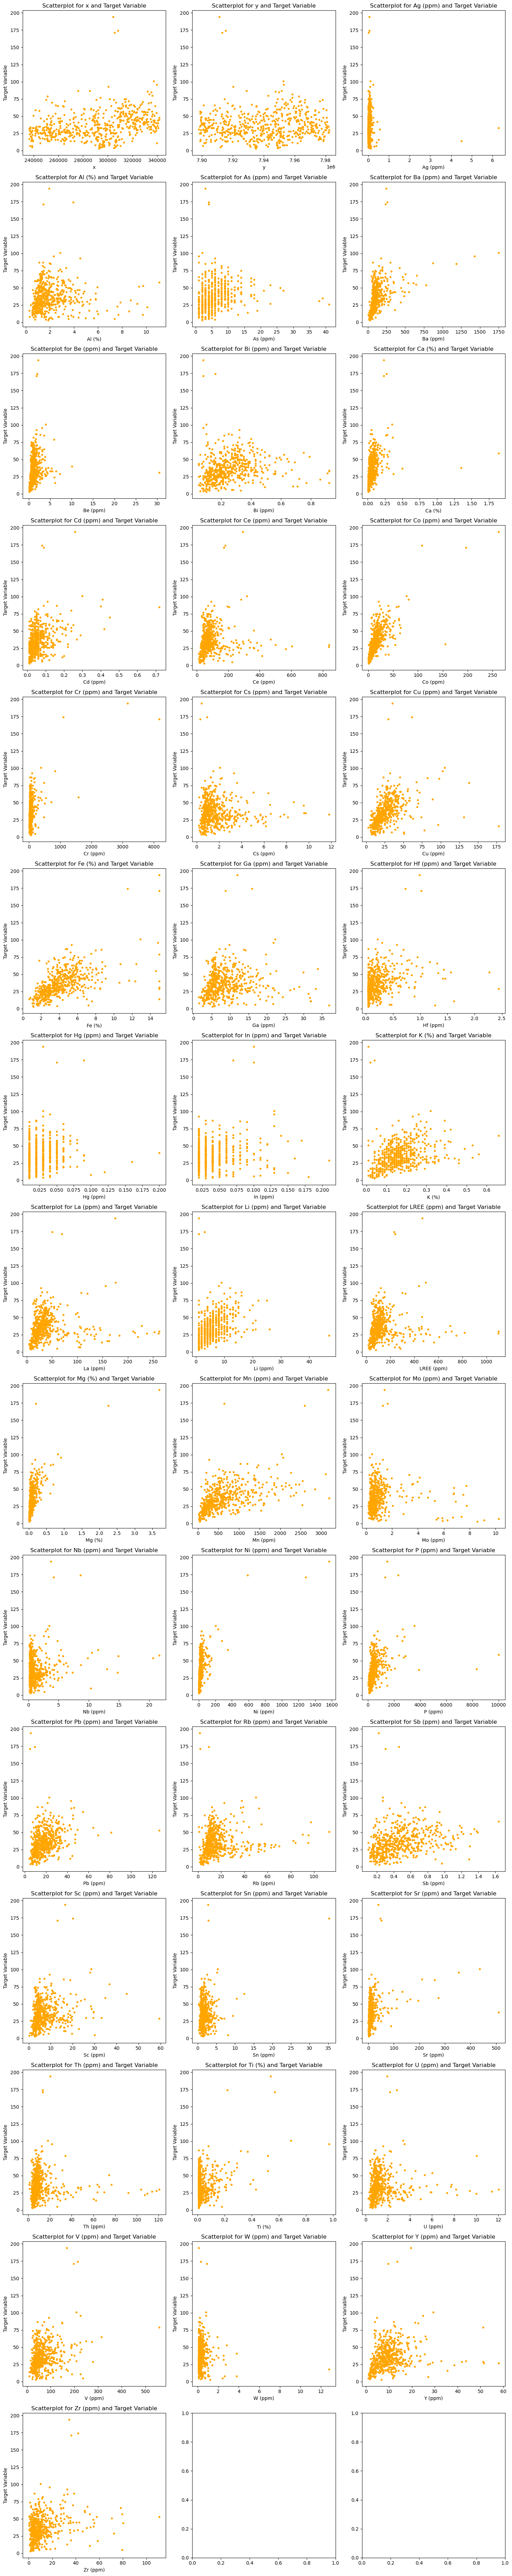

In [37]:
target_variable = df_train.columns[-1]
fig, axs = plt.subplots(15, 3, figsize=(15, 5 * 15))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# Loop through feature names
for i in range(len(df_train.columns)-1):  # Exclude the last column (assuming it's the target variable)
    axs[i].scatter(df_train[df_train.columns[i]], df_train[target_variable], s=10, color='orange')
    axs[i].set_title(f'Scatterplot for {df_train.columns[i]} and Target Variable')
    axs[i].set_xlabel(df_train.columns[i])
    axs[i].set_ylabel('Target Variable')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Geographic visualization of the data

